In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)
X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']
df_adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
## fit a OlS model with intercept on TV and Radio

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 29 Apr 2015   Prob (F-statistic):           4.83e-98
Time:                        00:08:18   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000         2.340     3.502
TV             0.0458      0.001     32.909      0.000         0.043     0.048
Radio          0.1880      0.008     23.382      0.000         0.172     0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# import formula api as alias smf
import statsmodels.formula.api as smf

# formula: response ~ predictor + predictor
est = smf.ols(formula = 'Sales ~ TV + Radio', data = df_adv).fit

NameError: name 'df_adv' is not defined

In [5]:
df = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data', index_col=0)

# copy data and separate predictors and response

X = df.copy()
y = X.pop('chd')

df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [6]:
# compute percentage of chronic heart disease for famhist
y.groupby(X.famhist).mean()

famhist
Absent     0.237037
Present    0.500000
Name: chd, dtype: float64

In [8]:
# ecode df.famhist as a numeric via pd.Factor
df['famhist_ord'] = pd.Categorical(df.famhist).codes

est = smf.ols(formula = 'chd ~ famhist_ord', data = df).fit()

In [10]:
from IPython.core.display import HTML
def short_summary(est):
    return HTML(est.summary().tables[1].as_html())

# fit OLS on categorical variables children and occupation
est = smf.ols(formula = 'chd ~ C(famhist)', data = df).fit()
short_summary(est)

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,0.2370,0.028,8.489,0.000,0.182 0.292
C(famhist)[T.Present],0.2630,0.043,6.071,0.000,0.178 0.348


In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/statsmodels/statsmodels/master/statsmodels/datasets/randhie/src/randhie.csv')
df['logincome'] = np.log1p(df.income)

df[['mdvis', 'logincome', 'hlthp']].tail()

,mdvis,logincome,hlthp
20185,2,8.815268,0
20186,0,8.815268,0
20187,8,8.921870,0
20188,8,7.548329,0
20189,6,8.815268,0


In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(df.logincome, df.mdvis, alpha = 0.3)
plt.xlabel('Log income')
plt.ylabel('Number of visits')

income_linspace = np.linspace(df.logincome.min(), df.logincome.max(), 100)

est = smf.ols(formula = 'mdvis ~ logincome + hlthp', data = df).fit()

plt.plot(income_linspace, est.params[0] + est.params[1] * income_linspace + est.params[2] * 0, 'r')
plt.plot(income_linspace, est.params[0] + est.params[1] * income_linspace + est.params[2] * 1, 'g')
short_summary(est)

NameError: name 'df' is not defined

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,0.5217,0.234,2.231,0.026,0.063 0.980
hlthp,-0.4991,0.890,-0.561,0.575,-2.243 1.245
logincome,0.2630,0.027,9.902,0.000,0.211 0.315
hlthp:logincome,0.4868,0.110,4.441,0.000,0.272 0.702


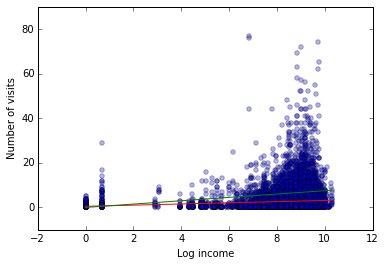

In [24]:
plt.scatter(df.logincome, df.mdvis, alpha = 0.3)
plt.xlabel('Log income')
plt.ylabel('Number of visits')

income_linspace = np.linspace(df.logincome.min(), df.logincome.max(), 100)

est = smf.ols(formula = 'mdvis ~ hlthp * logincome', data = df).fit()

plt.plot(income_linspace, est.params[0] + est.params[1] * 0 + est.params[2] * income_linspace + est.params[3] * 0 * income_linspace , 'r')
plt.plot(income_linspace, est.params[0] + est.params[1] * 1 + est.params[2] * income_linspace + est.params[3] * 1 * income_linspace, 'g')
short_summary(est)

In [7]:
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv')

In [8]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


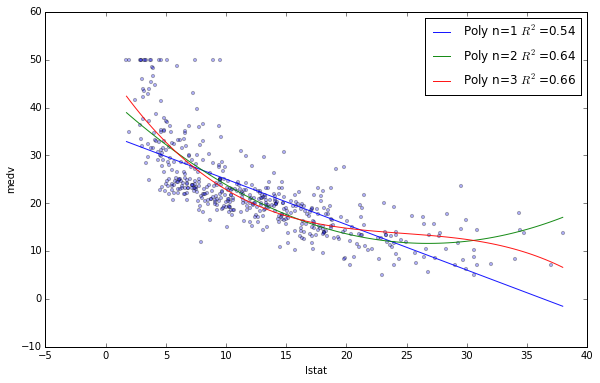

In [11]:
plt.figure(figsize = (6 * 1.618, 6))
plt.scatter(df.lstat, df.medv, s=10, alpha = 0.3)
plt.xlabel('lstat')
plt.ylabel('medv')

x = pd.DataFrame({'lstat': np.linspace(df.lstat.min(), df.lstat.max(), 100)})

poly_1 = smf.ols(formula = 'medv ~ 1 + lstat', data = df).fit()
plt.plot(x.lstat, poly_1.predict(x), 'b-', label = 'Poly n=1 $R^2$=%.2f' % poly_1.rsquared, alpha = 0.9)

poly_2 = smf.ols(formula = 'medv ~ 1 + lstat + I(lstat ** 2.0)', data = df).fit()
plt.plot(x.lstat, poly_2.predict(x), 'g-', label = 'Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha = 0.9)

poly_3 = smf.ols(formula = 'medv ~ 1 + lstat + I(lstat ** 2.0) + I(lstat ** 3.0)', data = df).fit()
plt.plot(x.lstat, poly_3.predict(x), 'r-', alpha = 0.9, label = 'Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()

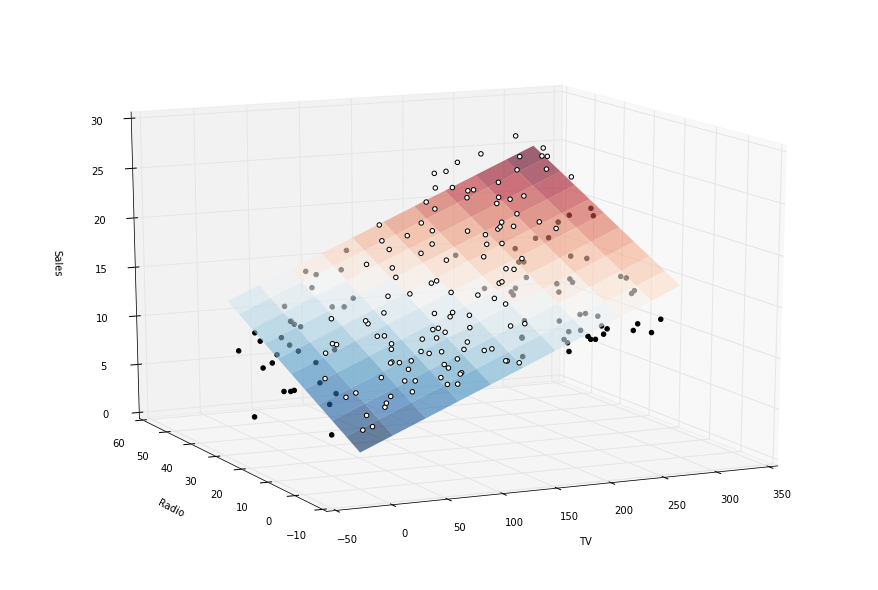

In [15]:
from mpl_toolkits.mplot3d import Axes3D

X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## tv/radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), np.linspace(X.Radio.min(), X.Radio.max(), 100))

# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize = (12, 8))
ax = Axes3D(fig, azim = -115, elev=15)

# plot hpyerplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha = 0.6, linewidth = 0)

# plot data points

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >=0].Radio, y[resid >= 0], color = 'black', alpha = 1.0, facecolor = 'white')
ax.scatter(X[resid <0].TV, X[resid < 0 ].Radio, y[resid < 0], color = 'black', alpha = 1.0)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')